In [1]:
import tempo_plumes
from tempo_plumes.pipeline import run_one_plume_detection
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#new madrid
plant_lon, plant_lat = -89.5617, 36.5147

0


/home/qzhu/.conda/envs/melodies-monet-v1/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/qzhu/Code/tempo_plumes_detection/tempo_plumes/background.py:21: RuntimeWarning: All-NaN slice encountered
  mad = np.nanmedian(np.abs(field - np.nanmedian(field)))


False


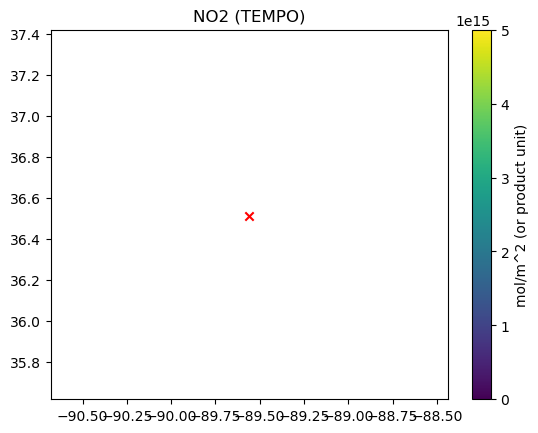

1
False


/home/qzhu/.conda/envs/melodies-monet-v1/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/qzhu/Code/tempo_plumes_detection/tempo_plumes/background.py:21: RuntimeWarning: All-NaN slice encountered
  mad = np.nanmedian(np.abs(field - np.nanmedian(field)))


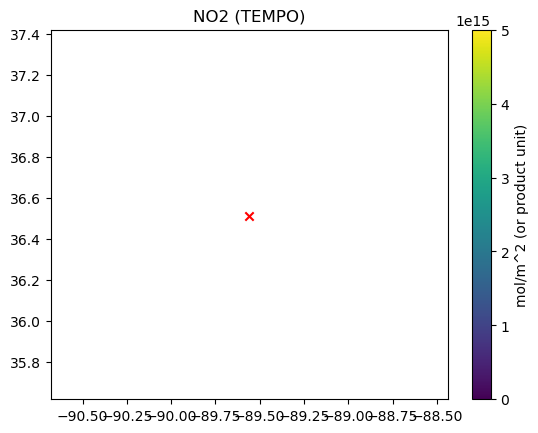

2
True


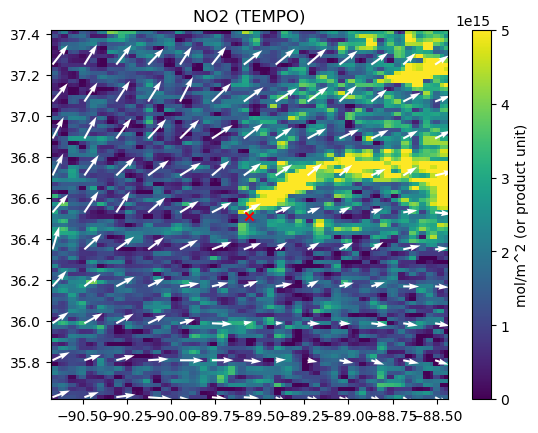

3
True


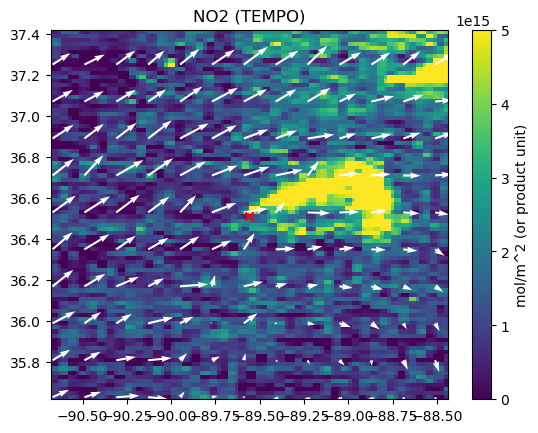

4
False


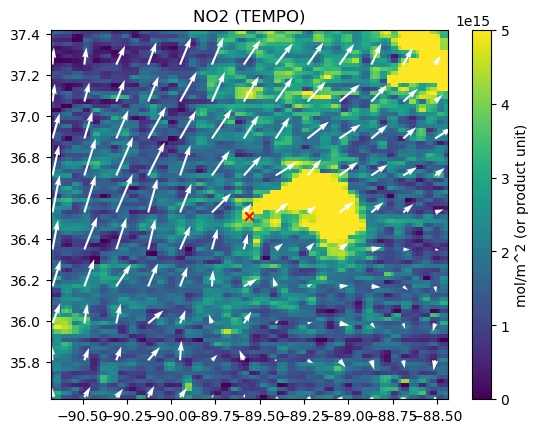

5
False


/home/qzhu/.conda/envs/melodies-monet-v1/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/qzhu/Code/tempo_plumes_detection/tempo_plumes/background.py:21: RuntimeWarning: All-NaN slice encountered
  mad = np.nanmedian(np.abs(field - np.nanmedian(field)))


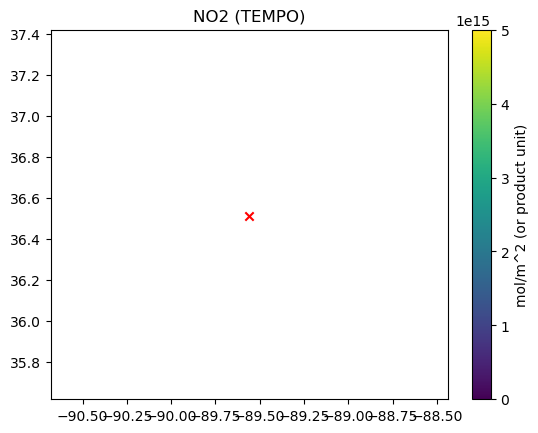

6
False


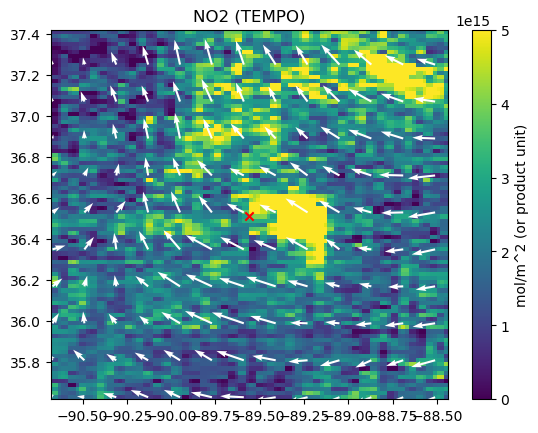

7
False


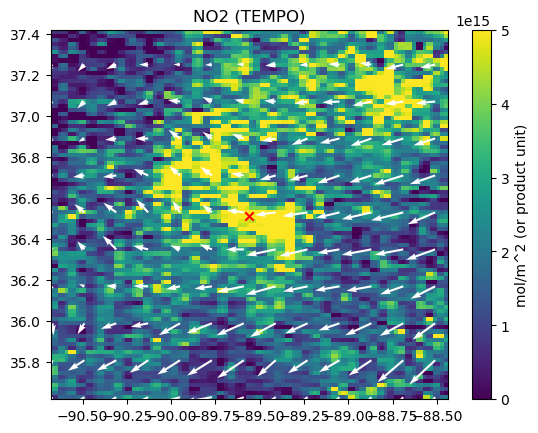

8
False


/home/qzhu/.conda/envs/melodies-monet-v1/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/qzhu/Code/tempo_plumes_detection/tempo_plumes/background.py:21: RuntimeWarning: All-NaN slice encountered
  mad = np.nanmedian(np.abs(field - np.nanmedian(field)))


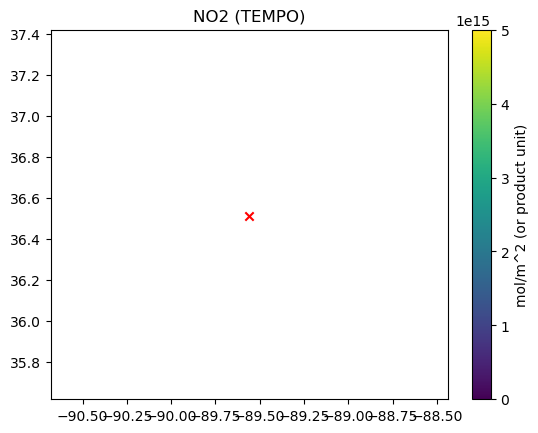

9
True


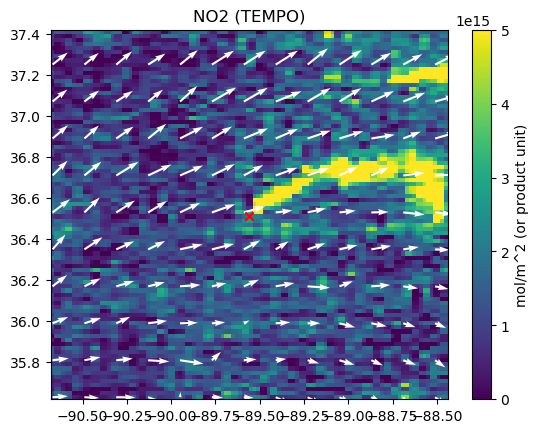

10
False


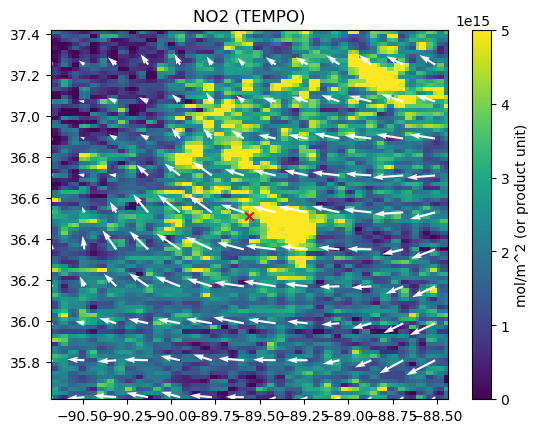

11
False


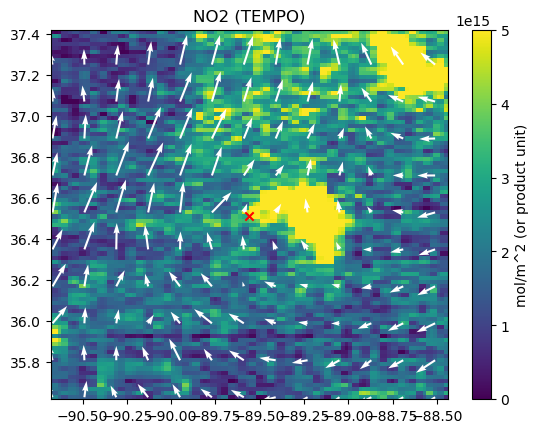

12
False


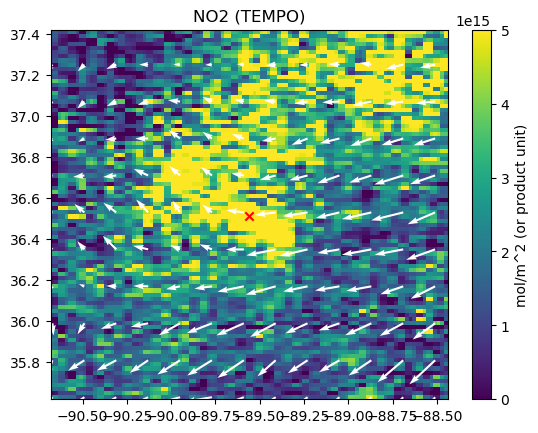

13
True


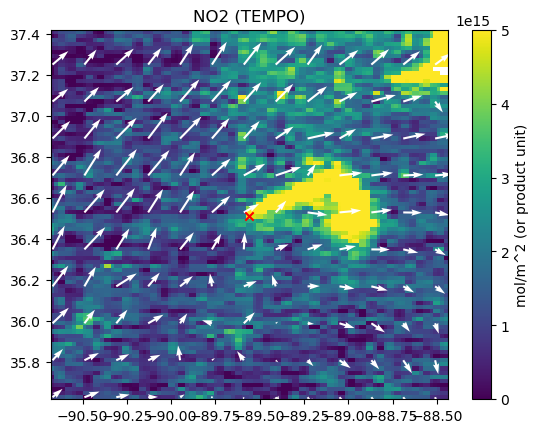

14
True


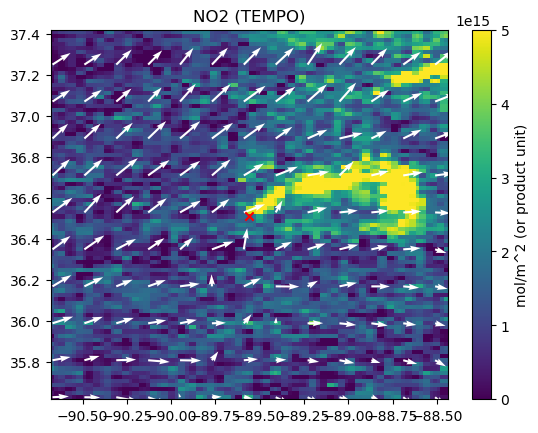

In [3]:
tempo_ncs = glob.glob('/scratch02/public/sao/qzhu/tempo/TEMPO_NO2_L3_V03/2024/03/28/' + '*.nc')
#i=4
for i in range(len(tempo_ncs)):
    print(i)
    tempo_nc = tempo_ncs[i]
    this_hour = os.path.basename(tempo_nc).split('T')[-1][:2]
    hrrr_grib = glob.glob('/scratch02/public/sao/qzhu/HRRR/hrrr/20240328/*t{}z.wrfnatf00.grib2'.format(this_hour))[0]
    plume_mask, metrics, ctx = run_one_plume_detection(
        tempo_nc=tempo_nc,
        hrrr_grib=hrrr_grib,
        plant_lon=plant_lon,
        plant_lat=plant_lat,
        hrrr_engine="cfgrib",     # 关键：GRIB 常用
        half_size_km=100.0,        # 先给大一点窗口
    )
    print(metrics['detected'])
    
    no2 = ctx["no2"]
    delta = ctx["delta"]
    u = ctx["u"]; v = ctx["v"]
    lon = ctx["lon"]; lat = ctx["lat"]
    
    plt.figure()
    plt.title("NO2 (TEMPO)")
    plt.pcolormesh(lon, lat, no2, shading="auto",vmin=0,vmax=5e15)
    plt.colorbar(label="mol/m^2 (or product unit)")
    step = max(1, u.shape[0]//10)
    plt.quiver(lon[::step,::step], lat[::step,::step], u[::step,::step], v[::step,::step], color='w')
    plt.scatter([plant_lon], [plant_lat], marker="x", color='red')
    plt.show()

In [11]:
896//10

89

In [3]:
hrrr_grid

'/scratch02/public/sao/qzhu/HRRR/hrrr/20240804/subset_76efbc01__hrrr.t21z.wrfnatf00.grib2'

In [33]:
print(metrics)

{'detected': False, 'reason': 'no_component_pass_filters'}


In [9]:
tempo_nc = "/scratch02/public/sao/qzhu/tempo/TEMPO_NO2_L3_V03/2024/08/04/TEMPO_NO2_L3_V03_20240804T145352Z_S007.nc"
hrrr_grib = "/scratch02/public/sao/qzhu/HRRR/hrrr/20240804/subset_a0efbc01__hrrr.t14z.wrfnatf00.grib2"

In [11]:
plume_mask, metrics, ctx = run_one_plume_detection(
    tempo_nc=tempo_nc,
    hrrr_grib=hrrr_grib,
    plant_lon=plant_lon,
    plant_lat=plant_lat,
    hrrr_engine="cfgrib",     # 关键：GRIB 常用
    half_size_km=80.0,        # 先给大一点窗口
)

In [5]:
plume_mask.shape

(72, 89)

In [12]:
metrics

{'detected': False, 'reason': 'no_components'}

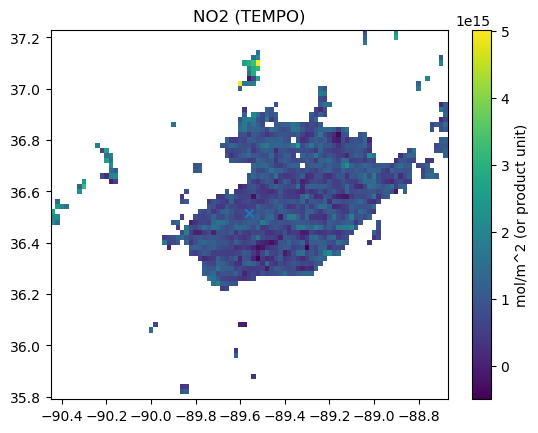

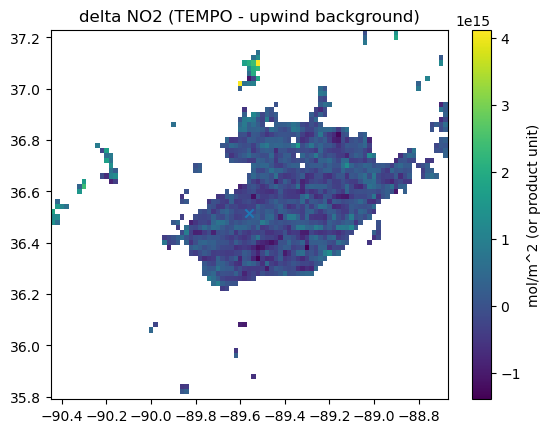

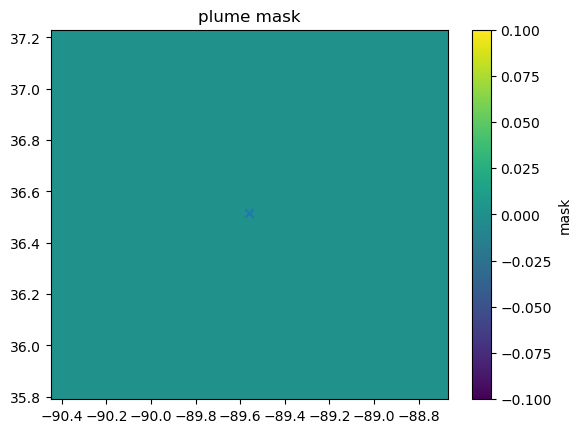

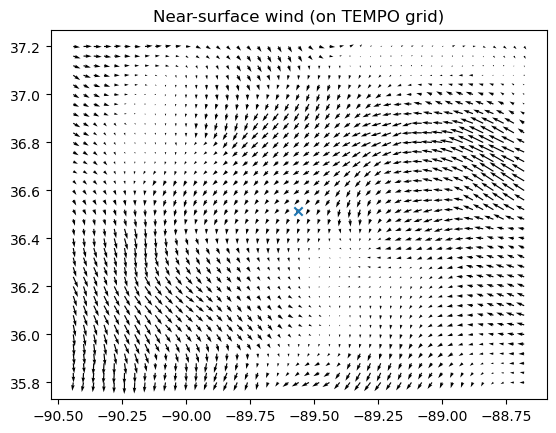

In [35]:
import matplotlib.pyplot as plt
import numpy as np

no2 = ctx["no2"]
delta = ctx["delta"]
u = ctx["u"]; v = ctx["v"]
lon = ctx["lon"]; lat = ctx["lat"]

plt.figure()
plt.title("NO2 (TEMPO)")
plt.pcolormesh(lon, lat, no2, shading="auto")
plt.colorbar(label="mol/m^2 (or product unit)")
plt.scatter([plant_lon], [plant_lat], marker="x")
plt.show()

plt.figure()
plt.title("delta NO2 (TEMPO - upwind background)")
plt.pcolormesh(lon, lat, delta, shading="auto")
plt.colorbar(label="mol/m^2 (or product unit)")
plt.scatter([plant_lon], [plant_lat], marker="x")
plt.show()

plt.figure()
plt.title("plume mask")
plt.pcolormesh(lon, lat, plume_mask.astype(int), shading="auto")
plt.colorbar(label="mask")
plt.scatter([plant_lon], [plant_lat], marker="x")
plt.show()

plt.figure()
plt.title("Near-surface wind (on TEMPO grid)")
step = max(1, u.shape[0]//30)
plt.quiver(lon[::step,::step], lat[::step,::step], u[::step,::step], v[::step,::step])
plt.scatter([plant_lon], [plant_lat], marker="x")
plt.show()